# 🌊 Kernel Density Estimation (KDE)

**Kernel Density Estimation (KDE)** is a non-parametric way to estimate the probability density function of a random variable. It is a fundamental tool in data science for "smoothing" data to see its true distribution.

---

### 1. How KDE Works
Instead of grouping data into discrete bins (like a histogram), KDE places a small "bump" (a **Kernel**) on top of every single data point. 

1. **Individual Kernels:** For every data point $x_i$, a kernel function $K$ is centered at that point.
2. **Summation:** The heights of all these kernels are added together at every point along the x-axis.
3. **Normalization:** The total sum is divided by the number of points to ensure the **total area under the curve equals 1**.



---

### 2. The Mathematical Formula
The estimated density $\hat{f}$ at any point $x$ is calculated as:

$$\hat{f}(x) = \frac{1}{nh} \sum_{i=1}^{n} K\left(\frac{x - x_i}{h}\right)$$

* **$n$:** The total number of data points.
* **$h$:** The **Bandwidth** (the most important parameter).
* **$K$:** The **Kernel function** (the shape of the "bump").

---

### 3. The Most Critical Component: Bandwidth ($h$)
The bandwidth controls how wide the individual kernels are. It determines the balance between **Bias** and **Variance**.

* **Low Bandwidth (Small $h$):** The kernels are very narrow. This leads to a "spiky" graph that overfits the data (High Variance).
* **High Bandwidth (Large $h$):** The kernels are very wide. This leads to a "flat" graph that washes out the data's features (High Bias).
* **Optimal Bandwidth:** The "sweet spot" that captures the general shape without the noise.



---

### 4. Choosing a Kernel ($K$)
While the **bandwidth** is the most important setting, you can also choose different shapes for the kernels:

1.  **Gaussian (Normal):** The most common. It produces very smooth, bell-shaped curves.
2.  **Epanechnikov:** Mathematically optimal in terms of minimizing error; looks like a parabola.
3.  **Uniform (Tophat):** Creates a "step-like" look; very similar to a moving average histogram.



---

### 📋 KDE vs. Histogram

| Feature | Histogram | KDE |
| :--- | :--- | :--- |
| **Appearance** | Discrete / Blocky | Continuous / Smooth |
| **Sensitivity** | Very sensitive to bin edges. | Independent of bin locations. |
| **Parameters** | Bin width & Bin origin. | Bandwidth ($h$) & Kernel ($K$). |
| **Accuracy** | Loss of information within bins. | Retains information about every point. |

---

**Summary:** KDE is the preferred method for visualizing data distributions because it avoids the arbitrary "stair-step" nature of histograms, providing a more natural view of the data's density.

In [1]:
from numpy.random import normal
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# genearate a sampe
sample1 = normal(loc=20,scale = 5,size = 300)
sample2 = normal(loc=40,scale=5,size=700)
sample = np.hstack((sample1,sample2))

(array([ 1.,  3.,  2.,  4.,  5., 10.,  9., 15., 18., 18., 22., 21., 21.,
        26., 25., 20., 21., 15., 12.,  7.,  7.,  9., 11., 13., 19., 21.,
        24., 34., 32., 43., 56., 52., 54., 64., 51., 50., 43., 39., 31.,
        25., 15., 15.,  3.,  6.,  3.,  1.,  1.,  1.,  1.,  1.]),
 array([ 6.98557719,  7.98840622,  8.99123525,  9.99406428, 10.99689331,
        11.99972234, 13.00255137, 14.00538041, 15.00820944, 16.01103847,
        17.0138675 , 18.01669653, 19.01952556, 20.02235459, 21.02518363,
        22.02801266, 23.03084169, 24.03367072, 25.03649975, 26.03932878,
        27.04215781, 28.04498685, 29.04781588, 30.05064491, 31.05347394,
        32.05630297, 33.059132  , 34.06196103, 35.06479007, 36.0676191 ,
        37.07044813, 38.07327716, 39.07610619, 40.07893522, 41.08176425,
        42.08459328, 43.08742232, 44.09025135, 45.09308038, 46.09590941,
        47.09873844, 48.10156747, 49.1043965 , 50.10722554, 51.11005457,
        52.1128836 , 53.11571263, 54.11854166, 55.12137069,

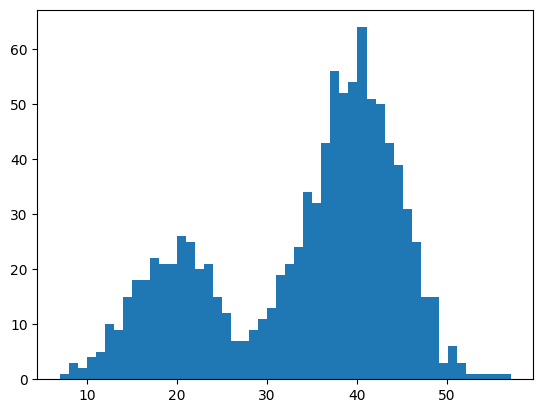

In [3]:
# plot  histogram bins =50
plt.hist(sample,bins=50)

In [4]:
from sklearn.neighbors import KernelDensity


In [5]:
model = KernelDensity(bandwidth=1.5,kernel='gaussian')

In [6]:
# convert data to a 2D array
sample = sample.reshape((len(sample),1))
model.fit(sample)

,"bandwidth bandwidth: float or {""scott"", ""silverman""}, default=1.0The bandwidth of the kernel. If bandwidth is a float, it defines thebandwidth of the kernel. If bandwidth is a string, one of the estimationmethods is implemented.",1.5
,"algorithm algorithm: {'kd_tree', 'ball_tree', 'auto'}, default='auto'The tree algorithm to use.",'auto'
,"kernel kernel: {'gaussian', 'tophat', 'epanechnikov', 'exponential', 'linear', 'cosine'}, default='gaussian'The kernel to use.",'gaussian'
,"metric metric: str, default='euclidean'Metric to use for distance computation. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.Not all metrics are valid with all algorithms: refer to thedocumentation of :class:`BallTree` and :class:`KDTree`. Note that thenormalization of the density output is correct only for the Euclideandistance metric.",'euclidean'
,"atol atol: float, default=0The desired absolute tolerance of the result. A larger tolerance willgenerally lead to faster execution.",0
,"rtol rtol: float, default=0The desired relative tolerance of the result. A larger tolerance willgenerally lead to faster execution.",0
,"breadth_first breadth_first: bool, default=TrueIf true (default), use a breadth-first approach to the problem.Otherwise use a depth-first approach.",True
,"leaf_size leaf_size: int, default=40Specify the leaf size of the underlying tree. See :class:`BallTree`or :class:`KDTree` for details.",40
,"metric_params metric_params: dict, default=NoneAdditional parameters to be passed to the tree for use with themetric. For more information, see the documentation of:class:`BallTree` or :class:`KDTree`.",None


In [7]:
values = np.linspace(sample.min(),sample.max(),100)
values = values.reshape(len(values),1)

In [8]:
probabilities = model.score_samples(values)
probabilities = np.exp(probabilities)

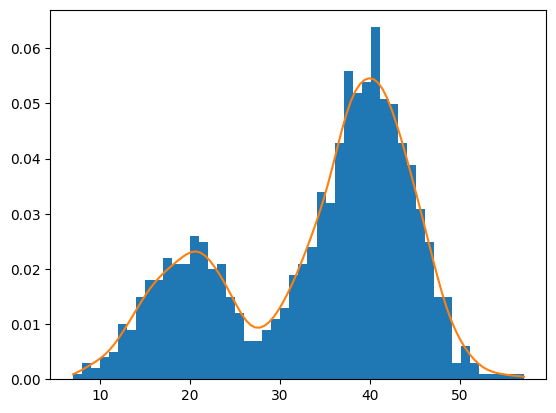

In [9]:
plt.hist(sample,bins=50,density=True)
plt.plot(values[:],probabilities)
plt.show()

<Axes: ylabel='Density'>

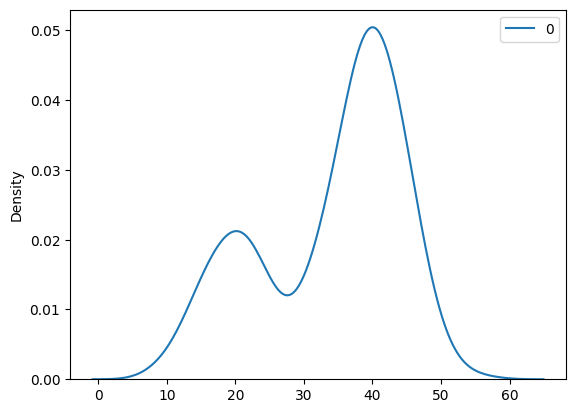

In [10]:
sns.kdeplot(sample,bw_adjust=1)